# L01 06/03/24

## First exercise:
- Generate 1k events gaussian distributed
- write functions to estimate the mean and the std of the dataset

In [136]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit

events = np.random.standard_normal(1000)
events

array([-1.28245767e+00,  1.01568949e+00, -1.07934596e-01, -6.30313744e-02,
       -9.19433312e-01,  2.66928703e+00,  1.64431085e+00,  4.83526079e-01,
        3.16380743e-01, -1.04950033e+00, -3.01880584e-01,  1.07438977e+00,
       -7.42219565e-01, -1.31618497e+00, -5.14925817e-01,  3.65141605e-01,
        9.41118745e-01,  1.67000815e+00,  2.71674643e-01, -5.76700968e-01,
       -9.65505684e-01, -5.99790547e-01, -1.73122451e+00, -8.11130351e-01,
       -7.17187015e-01, -5.99912217e-01,  5.49955682e-01,  5.11790419e-01,
        8.95281832e-01, -8.67608048e-01,  7.66896206e-01, -5.24974251e-01,
       -7.80449896e-01,  5.58995273e-03,  2.59736644e-01, -6.82725267e-01,
        2.50427072e-02,  1.85310185e+00, -3.80730011e-01, -1.00831692e-01,
        1.00738024e+00, -6.27847388e-01,  3.21469877e-01, -8.31372571e-01,
       -2.78355363e-01,  1.16719359e+00,  2.87557023e-01,  1.07252557e-01,
        7.36456473e-01,  1.99569240e+00,  5.40442244e-01,  5.17628776e-02,
       -1.27475712e+00, -

In [137]:
variance = (1/len(events)) * sum((x**2  for x in events)) - events.mean()**2
variance

0.9962100070514857

In [138]:
np.var(events)

0.9962100070514864

In [139]:
#%timeit (1/len(events)) * sum((x**2  for x in events)) - events.mean()**2
#%timeit np.var(events)

-----

## Second exercise
Estimate parameters

First, we generate the data we need

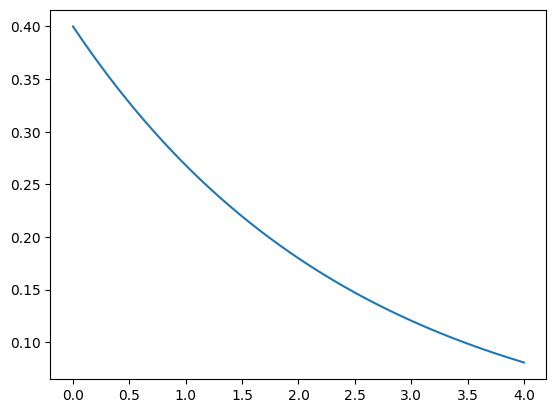

In [140]:
def RadioactiveDistribution(x, t):
   y = (1/t) * np.exp(1)**(-x/t)
   return y

x = np.arange(0, 4, 0.0001)
plt.plot(x, RadioactiveDistribution(x, 2.5))

(array([5536., 4035., 3176., 2620., 2229., 1941., 1718., 1541., 1398.,
        1278., 1178., 1092., 1018.,  954.,  896.,  846.,  800.,  760.,
         724.,  690.,  660.,  631.,  607.,  583.,  561.,  540.,  522.,
         505.,  488.,  473.]),
 array([0.04632539, 0.06700343, 0.08768147, 0.10835952, 0.12903756,
        0.1497156 , 0.17039364, 0.19107169, 0.21174973, 0.23242777,
        0.25310581, 0.27378386, 0.2944619 , 0.31513994, 0.33581799,
        0.35649603, 0.37717407, 0.39785211, 0.41853016, 0.4392082 ,
        0.45988624, 0.48056428, 0.50124233, 0.52192037, 0.54259841,
        0.56327645, 0.5839545 , 0.60463254, 0.62531058, 0.64598862,
        0.66666667]),
 <BarContainer object of 30 artists>)

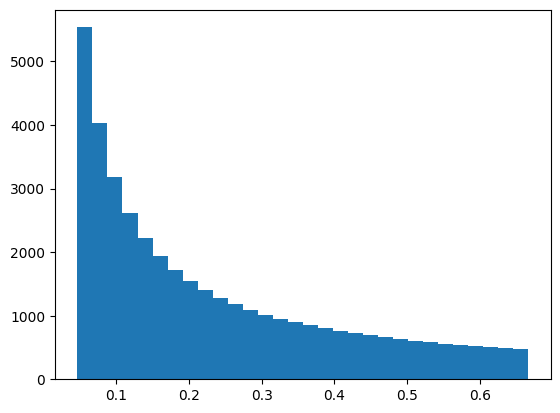

In [141]:
plt.hist(RadioactiveDistribution(x, 1.5), bins=30)


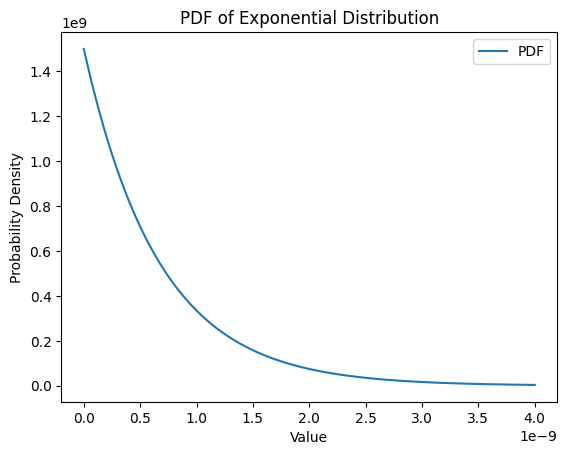

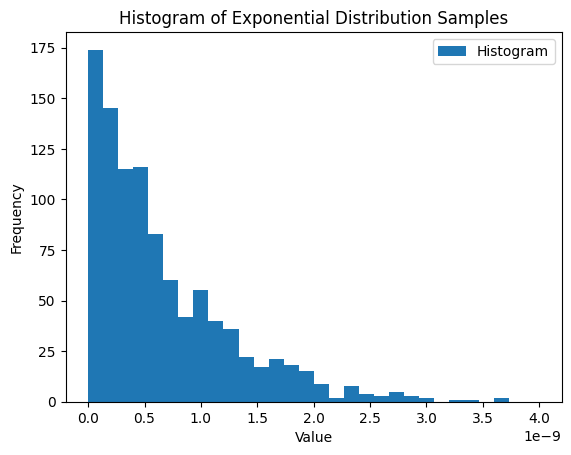

In [142]:
# Define the exponential distribution
exp = st.expon(scale=1/1.5 * 10**-9)

# Generate random samples from the distribution
exp_samples = exp.rvs(size=1000)

# Plot the probability density function (PDF)
n = np.linspace(0, 4 * 10**-9, 1000)
plt.plot(n, exp.pdf(n), label='PDF')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF of Exponential Distribution')
plt.legend()
plt.show()

# Plot the histogram of samples
plt.hist(exp_samples, bins=30, range=[0, 4 * 10**-9], label='Histogram')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Exponential Distribution Samples')
plt.legend()
plt.show()

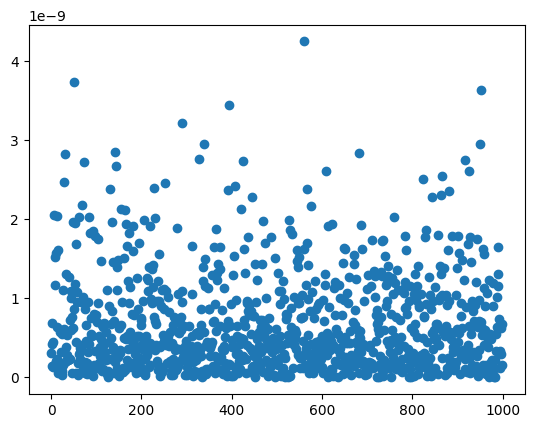

In [143]:
plt.plot(exp_samples, 'o')

In [144]:
# Define the parameters
num_samples = 1000
bin_width = (4 * 10**-9) / 30  # Width of each bin
range_start = 0
range_end = 4 * 10**-9

# Generate 1000 samples from the exponential distribution
param = 1.5 * 10**-9
samples = np.random.exponential(scale=param, size=num_samples)

# Initialize a list to store the sum of values in each bin
bin_sums = []


In [145]:
def height_bins():
    bin_starts = np.linspace(0, 4 * 10**-9, 31)[:-1]  # Start of each bin
    bin_ends = np.linspace(0, 4 * 10**-9, 31)[1:]    # End of each bin
    for start, end in zip(bin_starts, bin_ends):
        # Count the number of samples falling into the current bin
        bin_sum = np.sum((samples >= start) & (samples < end))
        bin_sums.append(bin_sum)
    return bin_sums

In [146]:
def var_bins():
    bin_starts = np.linspace(0, 4 * 10**-9, 31)[:-1]  # Start of each bin
    bin_ends = np.linspace(0, 4 * 10**-9, 31)[1:]    # End of each bin
    variances = []
    for start, end in zip(bin_starts, bin_ends):
        # Filter samples falling into the current bin
        samples_in_bin = exp_samples[(exp_samples >= start) & (exp_samples < end)]
        # Check if there are more than 1 sample in the bin
        if len(samples_in_bin) > 1:
            # Calculate the variance of samples in the current bin
            bin_variance = np.var(samples_in_bin)
            variances.append(bin_variance)
        else:
            variances.append(0)
    return variances

In [147]:
var_bins()

[1.5041978856131455e-21,
 1.4405570140875168e-21,
 1.4345456019761071e-21,
 1.729067904738942e-21,
 1.4599313083901752e-21,
 1.5017699378673846e-21,
 1.3661839810023015e-21,
 1.4489306635800031e-21,
 1.3777683289940356e-21,
 1.5096645086094588e-21,
 9.882889523643418e-22,
 1.4053872904628285e-21,
 1.2148156057913368e-21,
 1.1572347160061048e-21,
 1.372937599926057e-21,
 2.129232985925874e-21,
 2.287763452425228e-23,
 1.8732977508344104e-21,
 7.544517147785336e-22,
 8.901321894326397e-22,
 9.868907286696488e-22,
 1.3612014111727028e-22,
 1.0057503946434976e-23,
 0,
 0,
 0,
 0,
 2.8734576690849386e-21,
 0,
 0]

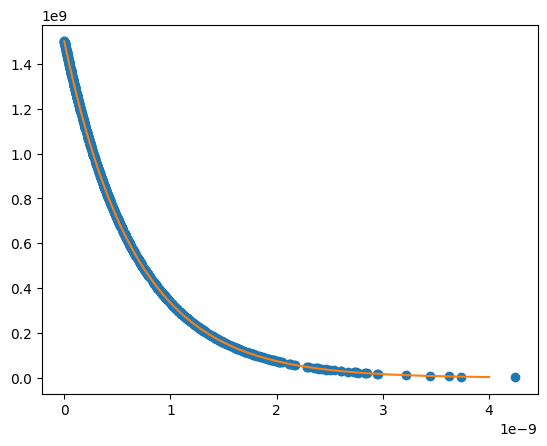

In [148]:
plt.plot(exp_samples, exp.pdf(exp_samples), 'o')
plt.plot(n, exp.pdf(n), label='PDF') # this is the perfect expon
plt.show()

In [158]:
h = height_bins()
var = var_bins()


values = []

for tao in np.arange(0.1, 3.0, 0.1):
    regression_function = st.expon(scale = 1/tao * 10 ** -9)
    chi = 0
    for i in range(0, 30):
        if var[i] != 0:  # Check if variance is not zero
            height = regression_function.pdf(bin_width/2 + bin_width*i) * bin_width * 1000
            chi += (h[i] - height)**2 / height
            # chi += (h[i] - regression_function.pdf(bin_width/2 + bin_width*i))**2 / var[i]
            # print((h[i] - regression_function.pdf(bin_width/2 + bin_width*i))**2)
            #chi += (h[i] - regression_function.pdf(bin_width/2 + bin_width*i))**2 / regression_function.pdf(bin_width/2 + bin_width*i)
    values.append([chi, tao])

sorted_values = sorted(values, key=lambda x: x[0])

sorted_values

[[33.89061613142144, 0.7000000000000001],
 [37.34022503860029, 0.6],
 [45.22847769052886, 0.8],
 [62.52689784614999, 0.5],
 [68.8036822215765, 0.9],
 [104.1706972884108, 1.0],
 [126.96975736266684, 0.4],
 [152.0689500485833, 1.1],
 [214.061167935553, 1.2000000000000002],
 [278.0575460081987, 0.30000000000000004],
 [292.42686622076735, 1.3000000000000003],
 [390.1902997658709, 1.4000000000000001],
 [511.23467226872947, 1.5000000000000002],
 [660.4866176416267, 1.6],
 [671.9423289736367, 0.2],
 [844.1714001360914, 1.7000000000000002],
 [1070.149491792331, 1.8000000000000003],
 [1348.353340120458, 1.9000000000000001],
 [1691.3513196392705, 2.0],
 [2115.0753578043423, 2.1],
 [2130.7526375246753, 0.1],
 [2639.760584910057, 2.2],
 [3291.1606556017277, 2.3000000000000003],
 [4102.1224085804715, 2.4000000000000004],
 [5114.6299061363015, 2.5000000000000004],
 [6382.46277520591, 2.6],
 [7974.660017347002, 2.7],
 [9980.041897948882, 2.8000000000000003],
 [12513.124315363535, 2.9000000000000004]]

In [151]:
def exponential_fit(x, scale):
    return st.expon.pdf(x, scale=scale)

parameters, covariance = curve_fit(exponential_fit, exp_samples, exp.pdf(exp_samples))

new = st.expon(scale = parameters[0])
parameters

array([0.87510848])

In [152]:
exp.pdf(exp_samples)

array([9.37456135e+08, 1.20816109e+09, 5.31533072e+08, 8.00294742e+08,
       1.24144843e+09, 7.60359220e+08, 1.18811020e+09, 6.95225979e+07,
       1.54258623e+08, 2.61428790e+08, 1.41169891e+08, 1.10597186e+09,
       1.05428619e+09, 5.72492835e+08, 6.99044012e+07, 1.37437559e+09,
       1.33624825e+08, 1.27444661e+09, 1.30047692e+09, 6.36498559e+08,
       6.15486072e+08, 1.28306589e+09, 9.22785224e+08, 1.33169274e+09,
       6.53521147e+08, 1.44373422e+09, 2.87412047e+08, 1.18263163e+09,
       5.93290684e+08, 3.72661958e+07, 1.11700407e+09, 2.15815296e+07,
       1.09440889e+09, 8.38171349e+08, 2.10868085e+08, 9.78139062e+08,
       6.74654212e+08, 1.07149195e+09, 1.06857455e+09, 2.24750053e+08,
       1.06224573e+09, 5.00733839e+08, 1.06343197e+09, 6.09431615e+08,
       2.88871571e+08, 3.30459767e+08, 1.36927490e+09, 4.79065996e+08,
       5.89247137e+08, 7.84489450e+07, 5.54839775e+06, 4.07494952e+08,
       2.54534667e+08, 8.08701086e+07, 1.19459402e+08, 7.73018876e+08,
      